In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Remove temperature, humidity, moisture, soil type

In [2]:
cross_val_scores=dict()
test_scores=dict()
train_scores=dict()

In [3]:
data=pd.read_csv("Fertilizer Prediction.csv")

In [4]:
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [5]:
print(data.columns)

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [6]:
data=data.drop(['Temparature', 'Humidity ', 'Moisture', 'Soil Type'],axis=1)

In [7]:
data.head()

,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,Maize,37,0,0,Urea
1,Sugarcane,12,0,36,DAP
2,Cotton,7,9,30,14-35-14
3,Tobacco,22,0,20,28-28
4,Paddy,35,0,0,Urea


In [22]:
x=x_train

In [23]:
x=x.drop(['Crop Type'],axis=1)

/tmp/ipykernel_840/1525531167.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: >

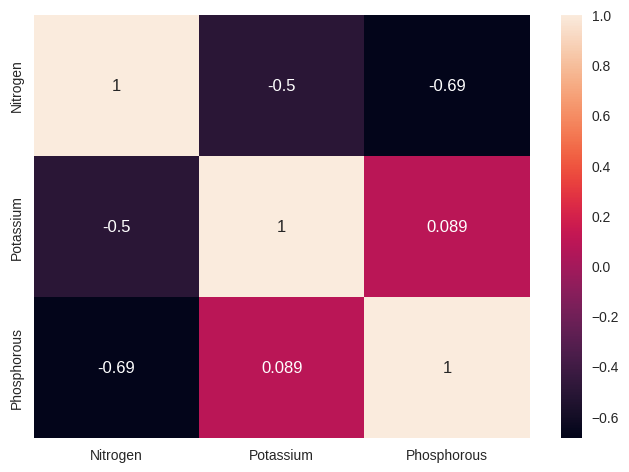

In [24]:
plt.style.use('seaborn')
sns.heatmap(x.corr(method='pearson'),annot=True)


In [12]:
def convert_to_dict(column):
    dictionary=dict()
    i=1
    for x in column:
        dictionary[x]=i
        i=i+1
    return dictionary

In [13]:
dict_crop=convert_to_dict(data['Crop Type'].unique())
dict_fertilizer=convert_to_dict(data['Fertilizer Name'].unique())

In [14]:
print(dict_crop)
print(dict_fertilizer)

{'Maize': 1, 'Sugarcane': 2, 'Cotton': 3, 'Tobacco': 4, 'Paddy': 5, 'Barley': 6, 'Wheat': 7, 'Millets': 8, 'Oil seeds': 9, 'Pulses': 10, 'Ground Nuts': 11}
{'Urea': 1, 'DAP': 2, '14-35-14': 3, '28-28': 4, '17-17-17': 5, '20-20': 6, '10-26-26': 7}


In [15]:
x_train=data
# x_train['Soil Type']=x_train['Soil Type'].apply(lambda x:dict_soil_type[x])
x_train['Crop Type']=x_train['Crop Type'].apply(lambda x:dict_crop[x])   
x_train['Fertilizer Name']=x_train['Fertilizer Name'].apply(lambda x:dict_fertilizer[x])   
y_train=data['Fertilizer Name']
x_train=x_train.drop('Fertilizer Name',axis=1)

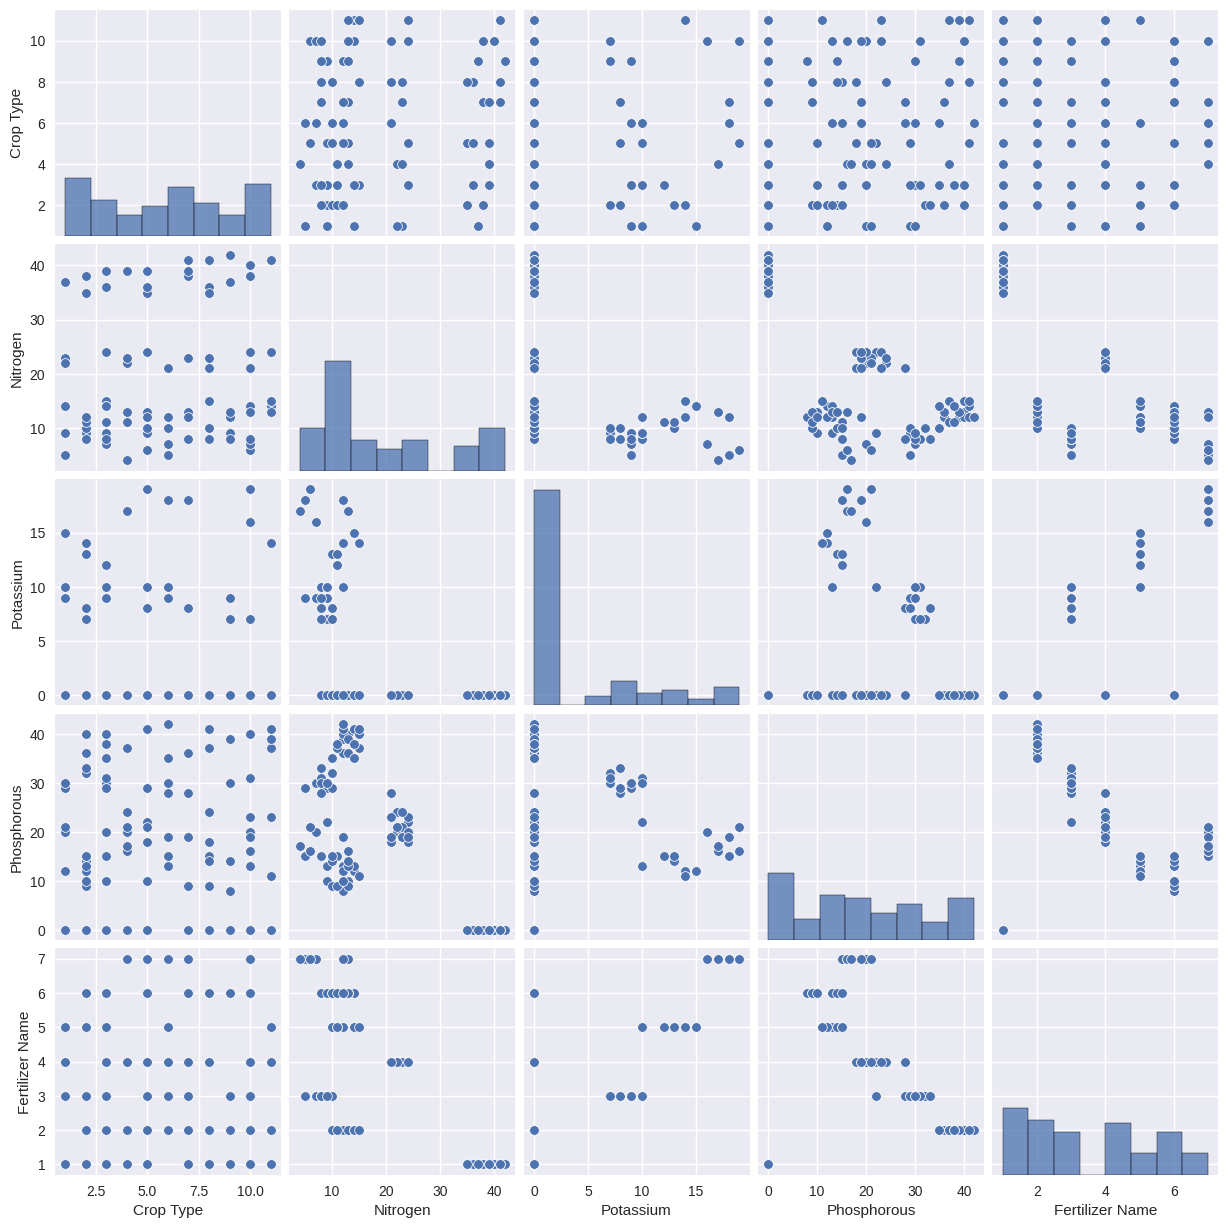

In [16]:
sns.pairplot(data)

In [25]:
data.head()

,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,1,37,0,0,1
1,2,12,0,36,2
2,3,7,9,30,3
3,4,22,0,20,4
4,5,35,0,0,1


In [26]:
x_train.head()

,Crop Type,Nitrogen,Potassium,Phosphorous
0,1,37,0,0
1,2,12,0,36
2,3,7,9,30
3,4,22,0,20
4,5,35,0,0


In [27]:
y_train.head()

0    1
1    2
2    3
3    4
4    1
Name: Fertilizer Name, dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Crop Type        99 non-null     int64
 1   Nitrogen         99 non-null     int64
 2   Potassium        99 non-null     int64
 3   Phosphorous      99 non-null     int64
 4   Fertilizer Name  99 non-null     int64
dtypes: int64(5)
memory usage: 4.0 KB


In [29]:
data.shape

(99, 5)

In [30]:
data.describe()

,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,5.848485,18.909091,3.383838,18.606061,3.393939
std,3.117965,11.599693,5.814667,13.476978,1.952592
min,1.000000,4.000000,0.000000,0.000000,1.000000
25%,3.000000,10.000000,0.000000,9.000000,2.000000
50%,6.000000,13.000000,0.000000,19.000000,3.000000
75%,8.000000,24.000000,7.500000,30.000000,5.000000
max,11.000000,42.000000,19.000000,42.000000,7.000000


In [31]:
data.nunique()

Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

In [38]:
data=np.array(data)
data=data.astype('float64')

In [39]:
a=data[:,: -1]
print(a.shape)

(99, 4)


In [40]:
y=data[:,-1]
print(y.shape)

(99,)


In [46]:
x_train, x_test, y_train, y_test = train_test_split( a, y, test_size=0.33, random_state=42)

In [47]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(66, 4) (66,)
(33, 4) (33,)


In [48]:
def normalize(x_train,x_test,index):
    m=x_train[:,index].mean()
    s=x_train[:,index].std()
    x_train[:,index]=(x_train[:,index]-m)/s
    x_test[:,index]=(x_test[:,index]-m)/s
    return x_train,x_test,m,s
    

In [49]:
indices_continuous=[1,2,3]
indices_categorical=[0]
mean_dict=dict()
std_dict=dict()

In [51]:
for x in indices_continuous:
    x_train,x_test,m,s=normalize(x_train,x_test,x)
    mean_dict[x]=m
    std_dict[x]=s
for x in indices_categorical:
    mean_dict[x]=0;
    std_dict[x]=1

In [52]:
mean_dict,std_dict

({1: -8.494888294480364e-17,
  2: -2.6914497566670462e-17,
  3: -4.457713659479795e-17,
  0: 0},
 {1: 0.9999999999999998, 2: 1.0, 3: 1.0, 0: 1})

In [53]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import multiprocessing

In [54]:
cpus=multiprocessing.cpu_count()
print(cpus)

2


In [55]:
parameters={'kernel':['linear','rbf','poly','sigmoid'],'C':[1,1.5,2,2.5,3,4,5,6,7]}

In [56]:
model=svm.SVC()

In [59]:
gs=GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=3,n_jobs=cpus)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=2,
             param_grid={'C': [1, 1.5, 2, 2.5, 3, 4, 5, 6, 7],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [60]:
gs.best_estimator_

SVC(C=1, kernel='linear')

In [61]:
gs.best_score_

0.9696969696969697

In [62]:
gs.best_params_

{'C': 1, 'kernel': 'linear'}

In [63]:
final_svm=svm.SVC(kernel='linear',C=1,random_state=0)
final_svm.fit(x_train,y_train)
print(final_svm.score(x_train,y_train))
print(final_svm.score(x_test,y_test))

1.0
1.0


In [64]:
scores=cross_val_score(final_svm,x_train,y_train,cv=3)
print(scores,scores.mean())
cross_val_scores['SVM']=scores.mean()

[1.         0.95454545 0.95454545] 0.9696969696969697


              precision    recall  f1-score   support

         1.0      1.000     1.000     1.000         7
         2.0      1.000     1.000     1.000         8
         3.0      1.000     1.000     1.000         4
         4.0      1.000     1.000     1.000         8
         5.0      1.000     1.000     1.000         2
         6.0      1.000     1.000     1.000         1
         7.0      1.000     1.000     1.000         3

    accuracy                          1.000        33
   macro avg      1.000     1.000     1.000        33
weighted avg      1.000     1.000     1.000        33



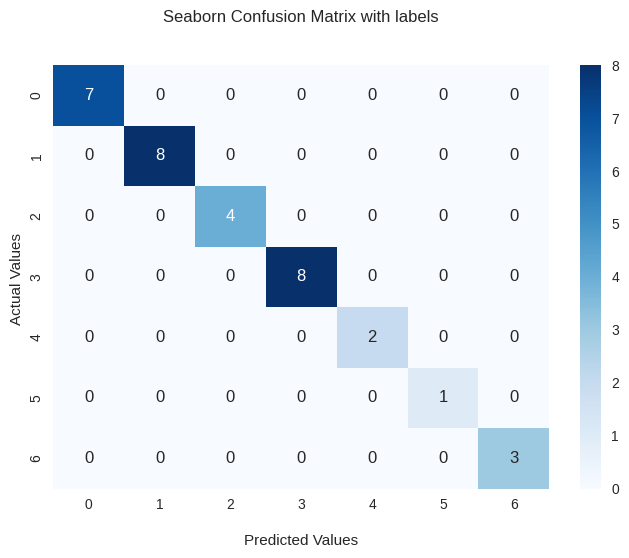

In [65]:
cf=metrics.confusion_matrix(y_test,final_svm.predict(x_test))
print(metrics.classification_report(y_test, final_svm.predict(x_test),digits=3))

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');



## Display the visualization of the Confusion Matrix.
plt.show()

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model=LogisticRegression(max_iter=5000)

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Parameters for GridSearch
parameters = {
    'max_iter': [500, 1000, 2000],
    'solver': ['saga', 'newton-cg', 'lbfgs', 'liblinear'],
    'C': [0.001, 0.01, 0.1, 1, 10]
}

model = LogisticRegression()

# Grid Search
gs = GridSearchCV(model, param_grid=parameters, scoring='accuracy', cv=3, n_jobs=-1)
gs.fit(x_train_scaled, y_train)

print(gs.best_estimator_)
print(gs.best_score_)


LogisticRegression(C=1, max_iter=500, solver='saga')
0.9696969696969697


In [69]:
final_model=LogisticRegression(max_iter=300,solver='sag',random_state=0)
scores=cross_val_score(model,x_train,y_train,cv=3)
final_model.fit(x_train,y_train)

/home/jovyan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=300, random_state=0, solver='sag')

In [70]:
print(scores,scores.mean())
cross_val_scores['Logistic Regression']=scores.mean()

[1.         0.95454545 0.95454545] 0.9696969696969697


In [71]:
print(final_model.score(x_train,y_train))
print(final_model.score(x_test,y_test))

0.9696969696969697
1.0


              precision    recall  f1-score   support

         1.0      1.000     1.000     1.000         7
         2.0      1.000     1.000     1.000         8
         3.0      1.000     1.000     1.000         4
         4.0      1.000     1.000     1.000         8
         5.0      1.000     1.000     1.000         2
         6.0      1.000     1.000     1.000         1
         7.0      1.000     1.000     1.000         3

    accuracy                          1.000        33
   macro avg      1.000     1.000     1.000        33
weighted avg      1.000     1.000     1.000        33



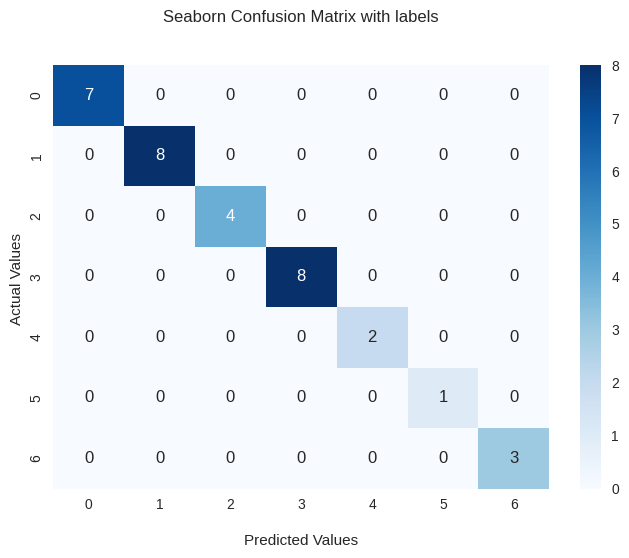

In [74]:
cf=metrics.confusion_matrix(y_test,final_model.predict(x_test))
print(metrics.classification_report(y_test, final_model.predict(x_test),digits=3))

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');



## Display the visualization of the Confusion Matrix.
plt.show()

In [73]:
from sklearn import tree

In [75]:
parameters={'criterion':['entropy','gini','log_loss'],'max_depth':[2,3,4,5],'min_samples_leaf':[5,10,15,20],'max_leaf_nodes':[3,4,5,6,7,8,10,11,12]}

In [76]:
model=tree.DecisionTreeClassifier()
gs=GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=3,n_jobs=cpus)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'min_samples_leaf': [5, 10, 15, 20]},
             scoring='accuracy')

In [77]:
gs.best_score_

0.893939393939394

In [78]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 5}

In [79]:
final_model=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,max_leaf_nodes=6,min_samples_leaf=5,random_state=0)
scores=cross_val_score(final_model,x_train,y_train,cv=3)
print(scores,scores.mean())
cross_val_scores['Decision Tree']=scores.mean()

[0.90909091 0.90909091 0.81818182] 0.8787878787878788


In [80]:
final_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=6,
                       min_samples_leaf=5, random_state=0)

In [81]:
print(final_model.score(x_train,y_train))
print(final_model.score(x_test,y_test))

0.9393939393939394
0.9090909090909091


[Text(0.5555555555555556, 0.875, 'Phosphorous <= -0.145\nentropy = 2.692\nsamples = 66\nvalue = [15, 10, 10, 9, 5, 13, 4]\nclass = Urea'),
 Text(0.3333333333333333, 0.625, 'Nitrogen <= 0.544\nentropy = 1.608\nsamples = 34\nvalue = [15, 0, 0, 0, 5, 13, 1]\nclass = Urea'),
 Text(0.2222222222222222, 0.375, 'Potassium <= 0.301\nentropy = 1.105\nsamples = 19\nvalue = [0, 0, 0, 0, 5, 13, 1]\nclass = 20-20'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 13, 0]\nclass = 20-20'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.65\nsamples = 6\nvalue = [0, 0, 0, 0, 5, 0, 1]\nclass = 17-17-17'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0, 0, 0, 0, 0, 0]\nclass = Urea'),
 Text(0.7777777777777778, 0.625, 'Potassium <= 0.033\nentropy = 1.884\nsamples = 32\nvalue = [0, 10, 10, 9, 0, 0, 3]\nclass = DAP'),
 Text(0.6666666666666666, 0.375, 'Phosphorous <= 0.925\nentropy = 0.998\nsamples = 19\nvalue = [0, 10, 0, 9, 0, 0, 0]\nclass

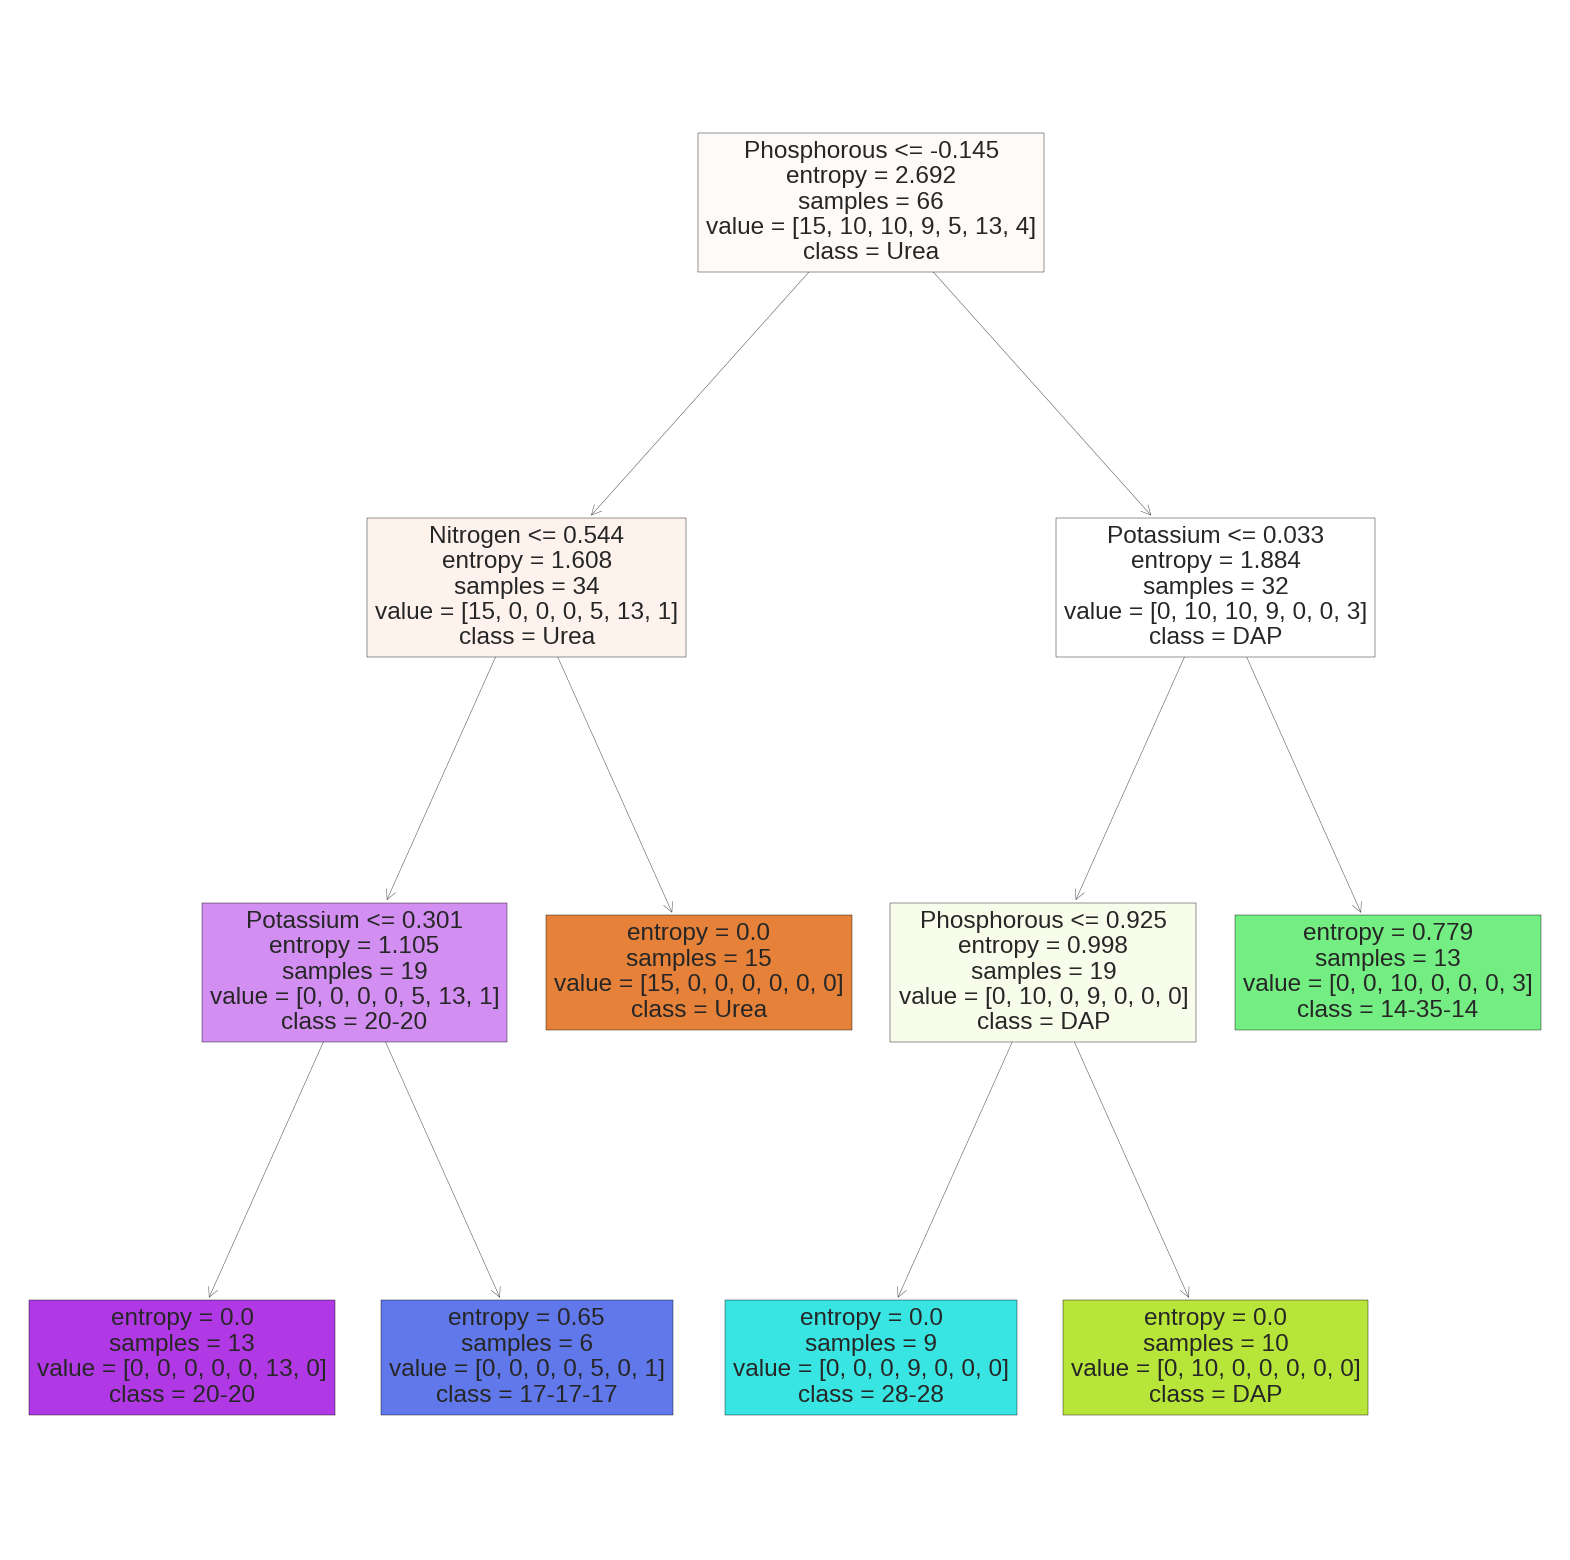

In [82]:
plt.figure(figsize=(20,20))
features=['Crop Type','Nitrogen','Potassium','Phosphorous']
tree.plot_tree(final_model,feature_names=features,class_names=list(dict_fertilizer.keys()),filled=True)

              precision    recall  f1-score   support

         1.0      1.000     1.000     1.000         7
         2.0      1.000     1.000     1.000         8
         3.0      0.571     1.000     0.727         4
         4.0      1.000     1.000     1.000         8
         5.0      1.000     1.000     1.000         2
         6.0      1.000     1.000     1.000         1
         7.0      0.000     0.000     0.000         3

    accuracy                          0.909        33
   macro avg      0.796     0.857     0.818        33
weighted avg      0.857     0.909     0.876        33



/home/jovyan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jovyan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jovyan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


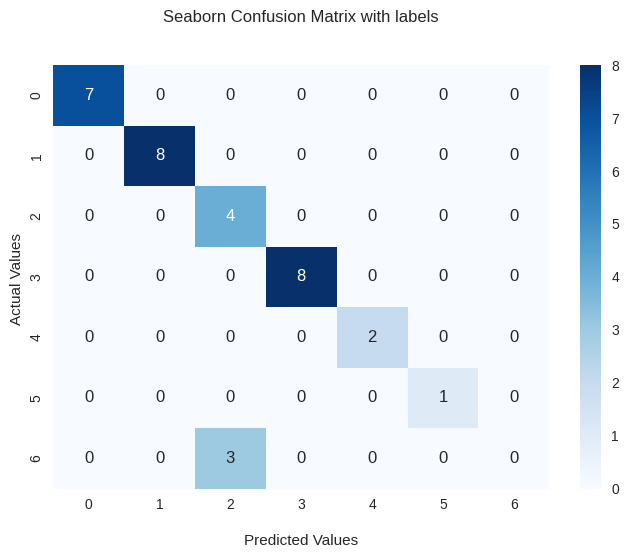

In [83]:
cf=metrics.confusion_matrix(y_test,final_model.predict(x_test))
print(metrics.classification_report(y_test, final_model.predict(x_test),digits=3))

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');



## Display the visualization of the Confusion Matrix.
plt.show()

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
model=RandomForestClassifier()

In [86]:
parameters={'criterion':['entropy','gini','log_loss'],
            'max_depth':[2,3,4,5],
            'max_leaf_nodes':[3,4,5,6,7,8],
            'n_estimators':[20,40,60,80,100,200,300],
            'max_samples':[1,2,3,4,5,6,7,8]
           }

In [87]:
final_model=RandomForestClassifier(n_estimators=30,bootstrap=True,criterion='entropy',max_leaf_nodes=3,max_samples=1,min_samples_leaf=10)
final_model=RandomForestClassifier(n_estimators=150,random_state=42)

In [88]:
final_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [89]:
print(final_model.score(x_train,y_train))
print(final_model.score(x_test,y_test))

1.0
1.0


In [90]:
scores=cross_val_score(final_model,x_train,y_train,cv=3)

In [91]:
print(scores,scores.mean())

[1.         1.         0.95454545] 0.9848484848484849


In [92]:
cross_val_scores['Random Forest']=scores.mean()

In [93]:
print(cross_val_scores)

{'SVM': 0.9696969696969697, 'Logistic Regression': 0.9696969696969697, 'Decision Tree': 0.8787878787878788, 'Random Forest': 0.9848484848484849}


In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
model=GaussianNB()

In [96]:
scores=cross_val_score(model,x_train,y_train,cv=3)

In [97]:
print(scores,scores.mean())

[1.         1.         0.90909091] 0.9696969696969697


In [98]:
model.fit(x_train,y_train)

GaussianNB()

In [99]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

1.0
1.0


In [100]:
cross_val_scores['Naive Bayes']=scores.mean()

[Text(0, 0, '0.969697'),
 Text(0, 0, '0.969697'),
 Text(0, 0, '0.878788'),
 Text(0, 0, '0.984848'),
 Text(0, 0, '0.969697')]

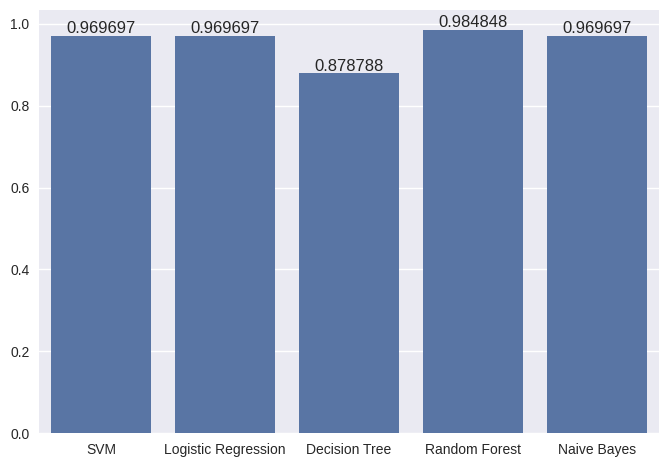

In [101]:
ax=sns.barplot(x=list(cross_val_scores.keys()),y=list(cross_val_scores.values()))
ax.bar_label(ax.containers[0])

In [102]:
cross_val_scores.values()

dict_values([0.9696969696969697, 0.9696969696969697, 0.8787878787878788, 0.9848484848484849, 0.9696969696969697])

In [103]:
final_model=RandomForestClassifier(n_estimators=150,random_state=42)
final_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [106]:
scores=cross_val_score(final_model,x_train,y_train,cv=3)

In [107]:
print(scores,scores.mean())

[1.         1.         0.95454545] 0.9848484848484849


In [109]:
import joblib


In [110]:
joblib.dump(final_model, 'model.pkl')


['model.pkl']

In [111]:
loaded_model = joblib.load('model.pkl')


In [112]:
pip install joblib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [114]:
joblib.dump(dict_crop,'dict_crop.pkl')
joblib.dump(dict_fertilizer,'dict_fertilizer.pkl')
joblib.dump(mean_dict,'mean_dict.pkl')
joblib.dump(std_dict,'std_dict.pkl')

['std_dict.pkl']

In [115]:
def predict(inp):
    dict_crop=joblib.load('dict_crop.pkl')
    dict_fertilizer=joblib.load('dict_fertilizer.pkl')
    mean_dict=joblib.load('mean_dict.pkl')
    std_dict=joblib.load('std_dict.pkl')
    
    ## extract input
    
    crop_type=inp['Crop Type']
    Nitrogen=inp['Nitrogen']
    Potassium=inp['Potassium']
    Phosphorous=inp['Phosphorous']
    
    # normalize
    
    x=np.array([dict_crop[crop_type],Nitrogen,Potassium,Phosphorous])
    x=x.astype('float64')
#     print(x)
    for i in range(len(x)):
        x[i]=x[i]-mean_dict[i]
        x[i]=x[i]/std_dict[i]
    test=np.array([x])
#     print(test,test.shape)
    model=joblib.load('model.pkl')
    no=int(model.predict(test))
    rev = {v: k for k, v in dict_fertilizer.items()}
#     print(rev)
#     print(rev[no])
    return rev[no]


In [116]:
dict={'Crop Type':'Cotton','Nitrogen':102,'Potassium':19,'Phosphorous':29}
print(predict(dict))

Urea


/tmp/ipykernel_840/3694588128.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  no=int(model.predict(test))


In [121]:
data=pd.read_csv("Fertilizer Prediction.csv")
data.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [131]:
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Assuming 'data' is a pandas DataFrame
data = np.array(data)

# Make predictions
for x in data:
    crop_dict = {
        'Crop Type': x[4],
        'Nitrogen': x[5],
        'Potassium': x[6],
        'Phosphorous': x[7]
    }
    prediction = predict(crop_dict)  # Assuming 'predict' is your prediction function
    print(x[8], prediction)


Urea Urea
DAP Urea
14-35-14 Urea
28-28 Urea
Urea Urea
17-17-17 Urea
20-20 Urea
Urea Urea
28-28 Urea
14-35-14 Urea
DAP Urea
17-17-17 Urea
Urea Urea
28-28 Urea
DAP Urea
17-17-17 Urea
Urea Urea
28-28 Urea
Urea Urea
DAP Urea
20-20 Urea
17-17-17 Urea
DAP Urea
Urea Urea
20-20 Urea
28-28 Urea
14-35-14 Urea
Urea Urea
DAP Urea
20-20 Urea
28-28 Urea
DAP Urea
Urea Urea
14-35-14 Urea
28-28 Urea
Urea Urea
14-35-14 Urea
DAP Urea
17-17-17 Urea
DAP Urea
20-20 Urea
14-35-14 Urea
28-28 Urea
Urea Urea
DAP Urea
14-35-14 Urea
20-20 Urea
28-28 Urea
Urea Urea
14-35-14 Urea
28-28 Urea
20-20 Urea
Urea Urea
DAP Urea
17-17-17 Urea
28-28 Urea
Urea Urea
20-20 Urea
17-17-17 Urea
DAP Urea
Urea Urea
20-20 Urea
28-28 Urea
10-26-26 Urea
Urea Urea
DAP Urea
20-20 Urea
14-35-14 Urea
10-26-26 Urea
20-20 Urea
28-28 Urea
Urea Urea
28-28 Urea
Urea Urea
DAP Urea
14-35-14 Urea
28-28 Urea
20-20 Urea
10-26-26 Urea
DAP Urea
14-35-14 Urea
Urea Urea
DAP Urea
20-20 Urea
28-28 Urea
14-35-14 Urea
10-26-26 Urea
Urea Urea
10-26-26 Urea
D